In [ ]:
#Loading CSV File from local drive
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['vgsales.csv']))

df.head()


In [ ]:
#Observing Null Values and dropping them
df.isnull().sum()
df.dropna(how= 'any', inplace= True)

#Dropping unneccesary columns and rows in order to give a better visual for what we are testing in our hypothesis

df1= df.drop(['Platform', 'Year', 'Publisher'], axis = 1)

df1= df1[(df1['Genre'] == 'Shooter') | (df1['Genre'] == 'Action')]

df1.sort_index(inplace = True)


In [ ]:
# Setting up seperate dataframes in order to fit our two-sample t-test 

ACT = df1[df1['Genre'] == 'Action']
SH  = df1[df1['Genre'] == 'Shooter']


ACT_Sales = pd.DataFrame(ACT['Global_Sales'])
SH_Sales =  pd.DataFrame(SH['Global_Sales'])



,Rank,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,Shooter,26.93,0.63,0.28,0.47,28.31
16,17,Grand Theft Auto V,Action,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,Action,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,Action,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,Action,8.41,5.49,0.47,1.78,16.15


In [ ]:
ACT_Sales.describe()

,Global_Sales
count,3251.000000
mean,0.529942
std,1.165238
min,0.010000
25%,0.070000
50%,0.190000
75%,0.500000
max,21.400000


In [ ]:
SH_Sales.describe()

,Global_Sales
count,1282.000000
mean,0.800468
std,1.833578
min,0.010000
25%,0.080000
50%,0.230000
75%,0.740000
max,28.310000


In [ ]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
# Calculating T and P Value
from scipy import stats

genre_tval, genre_pval = stats.ttest_ind(ACT_Sales,SH_Sales)

genre_pval

3.6025068155780427e-09

In [ ]:
ACT.describe()

Text(0.5, 1.0, 'Global Sales by Every Genre')

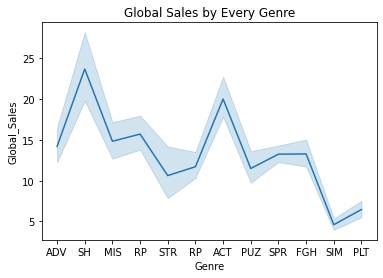

In [ ]:
#Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#plt.bar( 'Genre', 'Global_Sales', data = df1)

#plt.xlabel('Genre')
#plt.ylabel('Global Copies Sold (Millions)')
#plt.title('Shooter/Action Comparision')

ax = sns.lineplot(x = 'Genre', y = 'Global_Sales', data = df)
ax.set_xticks(df['Genre'].unique()) 
ax.set_xticklabels(['ADV', 'SH', 'MIS', 'RP', 'STR', 'RP', 'ACT', 'PUZ', 'SPR', 'FGH', 'SIM', 'PLT'])
ax.set_yticklabels(['0','5','10','15','20','25'])
ax.set_title('Global Sales by Every Genre')











In [ ]:
df.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37
